In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import shapiro
from scipy.stats import lognorm
from scipy.stats.stats import pearsonr
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:

path = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\preprocessed_df.csv"
total_df = pd.read_csv(path)

path1 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\descriptive_table.csv"
descript = pd.read_csv(path1)

path2 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\emt12.csv"
emt12_df = pd.read_csv(path2)

path3 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\emt34.csv"
emt34_df = pd.read_csv(path3)

path4 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\emt1.csv"
emt1_df = pd.read_csv(path4)

path5 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\cup12.csv"
cup12_df = pd.read_csv(path5)

path6 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\cup34.csv"
cup34_df = pd.read_csv(path6)

path7 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\cup1.csv"
cup1_df = pd.read_csv(path7)

path8 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\con12.csv"
con12_df = pd.read_csv(path8)

path9 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\con34.csv"
con34_df = pd.read_csv(path9)

path10 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\con1.csv"
con1_df = pd.read_csv(path10)

path11 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\rom142.csv"
rom142_df = pd.read_csv(path11)

path12 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\rom143.csv"
rom143_df = pd.read_csv(path12)

path13 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\rom122.csv"
rom122_df = pd.read_csv(path13)

path14 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\rom123.csv"
rom123_df = pd.read_csv(path14)

path15 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\wir4.csv"
wir4_df = pd.read_csv(path15)

path16 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\wir6.csv"
wir6_df = pd.read_csv(path16)

path17 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\wir10.csv"
wir10_df = pd.read_csv(path17)

<AxesSubplot:ylabel='Frequency'>

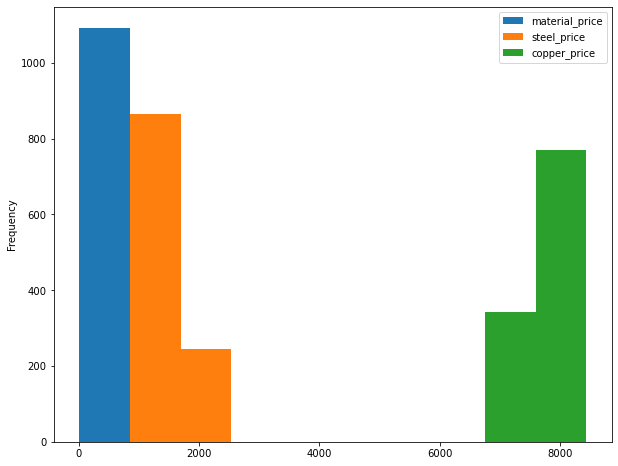

In [3]:
total_df.plot.hist(by=["material_price"], figsize=(10, 8))

In [4]:
# s_result_wir10[1]
s_result_emt12 = shapiro(emt12_df['material_price'])
s_result_emt34 = shapiro(emt34_df['material_price'])
s_result_emt1 = shapiro(emt1_df['material_price'])
s_result_cup12 = shapiro(cup12_df['material_price'])
s_result_cup34 = shapiro(cup34_df['material_price'])
s_result_cup1 = shapiro(cup1_df['material_price'])
s_result_con12 = shapiro(con12_df['material_price'])
s_result_con34 = shapiro(con34_df['material_price'])
s_result_con1 = shapiro(con1_df['material_price'])
s_result_rom142 = shapiro(rom142_df['material_price'])
s_result_rom143 = shapiro(rom143_df['material_price'])
s_result_rom122 = shapiro(rom122_df['material_price'])
s_result_rom123 = shapiro(rom123_df['material_price'])
s_result_wir4 = shapiro(wir4_df['material_price'])
s_result_wir6 = shapiro(wir6_df['material_price'])
s_result_wir10 = shapiro(wir10_df['material_price'])
s_result_total = shapiro(total_df['material_price'])

shapiro_t = []

Shapiro = [s_result_emt12,
s_result_emt34,
s_result_emt1,
s_result_cup12,
s_result_cup34,
s_result_cup1,
s_result_con12,
s_result_con34,
s_result_con1,
s_result_rom142,
s_result_rom143,
s_result_rom122,
s_result_rom123,
s_result_wir4,
s_result_wir6,
s_result_wir10,
s_result_total]

for s in Shapiro:
    results = {'statistic': s[0], 'pvalue': s[1]}
    shapiro_t.append(results)
mat_name = ['emt12',
'emt34',
'emt1',
'cup12',
'cup34',
'cup1',
'con12',
'con34',
'con1',
'rom142',
'rom143',
'rom122',
'rom123',
'wir4',
'wir6',
'wir10',
'total']


shapiro_table = pd.DataFrame(shapiro_t)
shapiro_table['material'] = mat_name
shapiro_table = shapiro_table.iloc[:,[2,0,1]]
shapiro_table

,material,statistic,pvalue
0,emt12,0.430655,2.030346e-18
1,emt34,0.839516,1.125241e-07
2,emt1,0.860589,2.261193e-06
3,cup12,0.878967,7.730939e-05
4,cup34,0.616757,3.905893e-13
5,cup1,0.198008,6.832307e-11
6,con12,0.902787,1.884013e-04
7,con34,0.589904,3.412347e-12
8,con1,0.547584,2.539232e-08
9,rom142,0.754265,2.413751e-12


<AxesSubplot:ylabel='Frequency'>

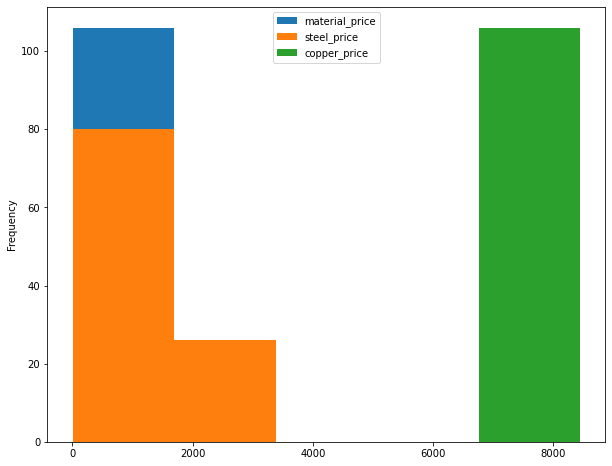

In [5]:
emt12_df.plot.hist(by=["material_price"], bins=5, figsize=(10, 8))

<AxesSubplot:ylabel='Density'>

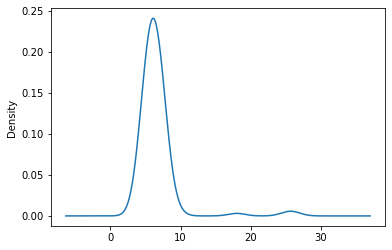

In [6]:
emt12_df["material_price"].plot(kind='kde')

In [7]:
emt12 = emt12_df['material_price']
emt34 = emt34_df['material_price']
emt1 = emt1_df['material_price']
cup12 = cup12_df['material_price']
cup34 = cup34_df['material_price']
cup1 = cup1_df['material_price']
con12 = con12_df['material_price']
con34 = con34_df['material_price']
con1 = con1_df['material_price']
rom142 = rom142_df['material_price']
rom143 = rom143_df['material_price']
rom122 = rom122_df['material_price']
rom123 = rom123_df['material_price']
wir4 = wir4_df['material_price']
wir6 = wir6_df['material_price']
wir10 = wir10_df['material_price']
total = total_df['material_price']

In [8]:
# Correlation between emt and couplings

print([pearsonr(descript['emt12'], descript['cup12']),
pearsonr(descript['emt34'], descript['cup34']),
pearsonr(descript['emt1'], descript['cup1'])])

[(0.9931429944986092, 8.0187624605883e-07), (0.9945986032633429, 3.9237129626277186e-07), (0.9140737575103076, 0.0014855961001349908)]


In [9]:
# Correlation between emt and connectors

print([pearsonr(descript['emt12'], descript['con12']),
pearsonr(descript['emt34'], descript['con34']),
pearsonr(descript['emt1'], descript['con1'])])

[(0.9935509699984384, 6.672986451517181e-07), (0.9777529972112387, 2.7069477738833144e-05), (0.9127242512836706, 0.0015550729688993843)]


In [10]:
# Correlation between wire

print([pearsonr(descript['wir4'], descript['wir6']),
pearsonr(descript['wir6'], descript['wir10']),
pearsonr(descript['wir10'], descript['wir4'])])

[(0.8779205045836025, 0.004142209150471029), (0.9945696429976216, 3.987077623902246e-07), (0.8457856505539635, 0.008141072563275625)]


In [11]:
# Correlation between romex

print([pearsonr(descript['rom142'], descript['rom143']),
pearsonr(descript['rom122'], descript['rom123'])])

[(0.6709470350627538, 0.06853600278279905), (0.9625383039698099, 0.00012776727081387944)]


In [12]:
total_df.head()

,material_description,material_price,vendor,location,dow,zip,region,date,raw_material,steel_price,copper_price,target_price
0,1/2 in. x 10 ft. Electric Metallic Tube (EMT) ...,7.22,homedepot,"2455 Paces Ferry Rd SE. Atlanta, GA, 30339",Thursday,30339,southeast,2022-10-20,steel,1500.53,7585.5,high price
1,1/2 in. x 10 ft. Electric Metallic Tube (EMT) ...,5.99,lowes,"1000 Lowe's Blvd. Mooresville, NC, 28117",Thursday,28117,east,2022-10-20,steel,1500.53,7585.5,about average
2,1/2 in. x 10 ft. Electric Metallic Tube (EMT) ...,4.73,gordonelectricsupply,"1290 N Hobbie Ave. Kankakee, Illinois, 60901",Thursday,60901,central,2022-10-20,steel,1500.53,7585.5,low price
3,1/2 in. x 10 ft. Electric Metallic Tube (EMT) ...,5.88,supplyworks,"6260 Abbott Dr. Omaha, Nebraska, 68110",Thursday,68110,central,2022-10-20,steel,1500.53,7585.5,low price
4,1/2 in. x 10 ft. Electric Metallic Tube (EMT) ...,9.09,ebay,"2025 Hamilton Avenue. San Jose, California, 95125",Thursday,95125,west,2022-10-20,steel,1500.53,7585.5,high price


In [13]:
# Create Encoding

le = LabelEncoder()
encoded_df = total_df
encoded_df['vendor'] = le.fit_transform(total_df['vendor'])
encoded_df['dow'] = le.fit_transform(total_df['dow'])
encoded_df['region'] = le.fit_transform(total_df['region'])
encoded_df['target_price'] = le.fit_transform(total_df['target_price'])
encoded_df['material_description'] = le.fit_transform(total_df['material_description'])
encoded_df['date'] = le.fit_transform(total_df['date'])
encoded_df['raw_material'] = le.fit_transform(total_df['target_price'])
encoded_df['steel_price'] = le.fit_transform(total_df['material_description'])
encoded_df['copper_price'] = le.fit_transform(total_df['date'])
encoded_df = encoded_df.drop(columns=["location", "zip"])
encoded_df.head()

,material_description,material_price,vendor,dow,region,date,raw_material,steel_price,copper_price,target_price
0,5,7.22,12,4,7,0,1,5,0,1
1,5,5.99,16,4,1,0,0,5,0,0
2,5,4.73,11,4,0,0,2,5,0,2
3,5,5.88,25,4,0,0,2,5,0,2
4,5,9.09,9,4,8,0,1,5,0,1


In [14]:
encoded_df.corr()

,material_description,material_price,vendor,dow,region,date,raw_material,steel_price,copper_price,target_price
material_description,1.000000,0.568827,-0.194042,0.004424,0.146818,0.107212,-0.098690,1.000000,0.107212,-0.098690
material_price,0.568827,1.000000,-0.232132,-0.004615,0.224898,0.034232,-0.145390,0.568827,0.034232,-0.145390
vendor,-0.194042,-0.232132,1.000000,0.002835,-0.457690,-0.029447,0.160120,-0.194042,-0.029447,0.160120
dow,0.004424,-0.004615,0.002835,1.000000,-0.002281,0.135560,-0.002636,0.004424,0.135560,-0.002636
region,0.146818,0.224898,-0.457690,-0.002281,1.000000,0.041935,-0.124469,0.146818,0.041935,-0.124469
date,0.107212,0.034232,-0.029447,0.135560,0.041935,1.000000,-0.045008,0.107212,1.000000,-0.045008
raw_material,-0.098690,-0.145390,0.160120,-0.002636,-0.124469,-0.045008,1.000000,-0.098690,-0.045008,1.000000
steel_price,1.000000,0.568827,-0.194042,0.004424,0.146818,0.107212,-0.098690,1.000000,0.107212,-0.098690
copper_price,0.107212,0.034232,-0.029447,0.135560,0.041935,1.000000,-0.045008,0.107212,1.000000,-0.045008
target_price,-0.098690,-0.145390,0.160120,-0.002636,-0.124469,-0.045008,1.000000,-0.098690,-0.045008,1.000000


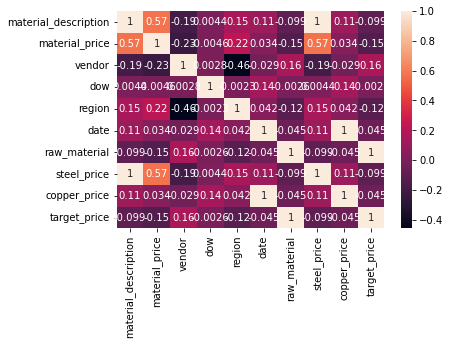

In [15]:
# Create Correlation Matrix

corr_matrix = encoded_df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [16]:
# Create bolean target by getting rid of 'about average' values

encoded_df = encoded_df[encoded_df.target_price != 0]
encoded_df.head()

,material_description,material_price,vendor,dow,region,date,raw_material,steel_price,copper_price,target_price
0,5,7.22,12,4,7,0,1,5,0,1
2,5,4.73,11,4,0,0,2,5,0,2
3,5,5.88,25,4,0,0,2,5,0,2
4,5,9.09,9,4,8,0,1,5,0,1
5,12,11.91,12,4,7,0,1,12,0,1


In [17]:
# Define the features set.
X = encoded_df.copy()
X = X.drop('target_price', axis=1)
X.head()

,material_description,material_price,vendor,dow,region,date,raw_material,steel_price,copper_price
0,5,7.22,12,4,7,0,1,5,0
2,5,4.73,11,4,0,0,2,5,0
3,5,5.88,25,4,0,0,2,5,0
4,5,9.09,9,4,8,0,1,5,0
5,12,11.91,12,4,7,0,1,12,0


In [18]:
# Define the target set. 1 = 'high price' and 2 = 'low price'

y = encoded_df['target_price'].values
y[:5]

array([1, 2, 2, 1, 1])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(642, 9)
(215, 9)
(642,)
(215,)


In [20]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Creating the decision tree classifier instance.
model = tree.DecisionTreeClassifier()
# Fitting the model.
model = model.fit(X_train_scaled, y_train)

# Making predictions using the testing data.
predictions = model.predict(X_test_scaled)
predictions

array([1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1])

In [21]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 2", "Actual 1"], columns=["Predicted 2", "Predicted 1"])

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
cm_df

,Predicted 2,Predicted 1
Actual 2,117,0
Actual 1,0,98


In [22]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 2,Predicted 1
Actual 2,117,0
Actual 1,0,98


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       117
           2       1.00      1.00      1.00        98

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215

